# Simple Amino acid eval 

imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


grab experimental data and numerical data

In [4]:
df_num_data = pd.read_csv("simple_amino.csv")
df_exp_data = pd.read_csv("single_mut_effects.csv")

quick look at the data frames

In [5]:
df_exp_data.describe()

,site_RBD,site_SARS2,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg
count,4221.000000,4221.000000,3994.000000,3991.000000,4003.000000,4183.000000,4184.000000,4198.000000
mean,101.000000,431.000000,-0.920441,-0.968637,-0.943600,-1.203875,-1.166883,-1.184726
std,58.029858,58.029858,1.389299,1.412122,1.391609,1.273002,1.233323,1.243281
min,1.000000,331.000000,-4.760000,-4.840000,-4.840000,-4.710000,-4.650000,-4.650000
25%,51.000000,381.000000,-1.080000,-1.230000,-1.140000,-2.200000,-2.120000,-2.150000
50%,101.000000,431.000000,-0.255000,-0.300000,-0.280000,-0.740000,-0.730000,-0.740000
75%,151.000000,481.000000,-0.040000,-0.050000,-0.050000,-0.125000,-0.140000,-0.140000
max,201.000000,531.000000,0.360000,0.380000,0.300000,0.920000,1.000000,0.990000


simple amino acids are those starting with single letter codes defined below:

D_amino = ["V", "I", "L", "M" , "F", "Y", "W"]

In [6]:
df_num_data.describe()

,Unnamed: 0,delta_delta_g_gen,delta_delta_g_gen_error,delta_delta_g_gen_66,delta_delta_g_gen_66_error
count,63.000000,63.000000,63.000000,63.000000,63.000000
mean,31.000000,-0.711097,0.139516,-0.539654,0.579494
std,18.330303,2.134639,0.329657,1.838006,0.897401
min,0.000000,-10.879800,0.000100,-8.891100,0.071700
25%,15.500000,-0.039700,0.000650,-0.037300,0.095750
50%,31.000000,-0.000800,0.004400,0.001300,0.135700
75%,46.500000,0.003450,0.050100,0.007350,0.469350
max,62.000000,0.059100,1.504500,0.356100,3.265400


notes on the numerical data:

$\Delta \Delta G$ calc is defined as wildtype - mutation. 

e.g. see F515A:
DELTA TOTAL_wild = -69.7344 
DELTA TOTAL_mut  = -69.7336
DELTA DELTA G binding = -0.0008

In [7]:
DELTA_TOTAL_wild = -69.7344 
DELTA_TOTAL_mut  = -69.7336
DELTA_TOTAL_wild- DELTA_TOTAL_mut

-0.0007999999999981355

get the indices for our mutants 

In [8]:
num_muts = df_num_data["mutations"]
exp_muts_np = df_exp_data["mutation"].to_numpy()
idx= []  
for mut in num_muts : 
    idx.append(np.where(exp_muts_np == mut )[0][0] ) 

check the mutations: 

uncomment below to double check

In [9]:
#exp_muts_np[idx], num_muts.to_numpy()

## Data evalutation: 

finding delta_G_deg from paper: 

In [10]:
R = 1.98*1e-3 #1e-3 for cal to kcal conversion 
T =298  #room temp  
K_D_app = 3.9*1e-11 #from paper 

#note we should get -R*T* (-np.log(K_D_app)) as we have a K_D and not a K_a
#the double neg is removed here. 
delta_g_deg = R * T * np.log(K_D_app)
delta_g_deg

-14.141759785560145

try using bind_avg column in the exp data frame 

In [11]:
site_SARS2_val = df_exp_data.iloc[idx]["bind_avg"].to_numpy()

### first method:


$$\Delta log_{10}(K_{D,app}) = log_{10}(K_{mutation}) - log_{10}(K_{D,app}) $$
$$given \_ value := \Delta log_{10}(K_{D,app})$$
$$10^{given\_ value} = K_{mutation}/K_{D,app}$$
$$ K_{mutation} =10^{given \_ value} * K_{D,app} $$

note: this is with the idea of mut - wildtype, which is not present in our numerical data, to make this convertion it just becomes 
$$\Delta log_{10}(K_{D,app}) = log_{10}(K_{D,app}) - log_{10}(K_{mutation})$$
$$ K_{mutation} =10^{- given \_ value} * K_{D,app} $$

but converting out numerical result to mut - wildtype is easier
$$\Delta \Delta G_{w-m} = - \Delta \Delta G_{m-w} $$
so we will do that 

In [12]:
#using GB66
num_66 = - df_num_data["delta_delta_g_gen_66"].to_numpy()

In [13]:
tmp_K_mut = 10**(site_SARS2_val) * K_D_app
#- sign due to K_d and not K_a 
delta_g_first_method = -R * T * np.log(tmp_K_mut)
delta_g_first_method 

array([14.68520671, 15.31017067, 14.60368967, 14.83465461, 14.5357588 ,
       20.66312287, 17.08995934, 17.33451046, 14.22327682, 14.08741509,
       15.03844721, 15.28299832, 14.35913855, 15.4460324 , 17.48395836,
       14.65803436, 15.90796229, 15.50037709, 14.08741509, 14.68520671,
       14.78030992, 20.66312287, 19.34526408, 17.44319984, 15.11996425,
       14.1825183 , 14.29120769, 15.32375684, 14.54934498, 14.20969065,
       15.16072277, 14.16893213, 15.96230698, 16.28837513, 13.99231188,
       18.2719564 , 15.45961857, 15.48679092, 14.49500029, 15.26941215,
       14.19610448, 17.10354552, 14.943344  , 15.26941215, 18.40781813,
       15.20148129, 16.72313267, 14.15534596, 15.32375684, 15.02486104,
       20.41857175, 15.07920573, 14.236863  , 15.06561956, 14.25044917,
       15.31017067, 14.26403534, 14.50858646, 14.5357588 , 19.65774606,
       14.10100127, 14.07382892, 16.12534106])

### $\Delta \Delta G$ calc

$$\Delta \Delta G =\Delta G \degree +R T ln(K_{mutation})$$

In [14]:
del_del_g_total =   delta_g_deg + delta_g_first_method  #i think signs are right here: 
del_del_g_total

array([ 0.54344692,  1.16841089,  0.46192988,  0.69289483,  0.39399902,
        6.52136308,  2.94819956,  3.19275067,  0.08151704, -0.05434469,
        0.89668742,  1.14123854,  0.21737877,  1.30427262,  3.34219858,
        0.51627458,  1.7662025 ,  1.35861731, -0.05434469,  0.54344692,
        0.63855013,  6.52136308,  5.20350429,  3.30144006,  0.97820446,
        0.04075852,  0.1494479 ,  1.18199706,  0.40758519,  0.06793087,
        1.01896298,  0.02717235,  1.82054719,  2.14661535, -0.1494479 ,
        4.13019662,  1.31785879,  1.34503114,  0.3532405 ,  1.12765237,
        0.05434469,  2.96178573,  0.80158421,  1.12765237,  4.26605835,
        1.0597215 ,  2.58137289,  0.01358617,  1.18199706,  0.88310125,
        6.27681196,  0.93744594,  0.09510321,  0.92385977,  0.10868938,
        1.16841089,  0.12227556,  0.36682667,  0.39399902,  5.51598627,
       -0.04075852, -0.06793087,  1.98358127])

plot w/ respect to binding site

In [15]:
mut_arg =np.array([mut[1:-1] for mut in df_num_data["mutations"].to_numpy()])
mut_arg_idx = mut_arg.argsort()
mut_arg_sorted = mut_arg[mut_arg_idx]

Text(0.5, 0, 'site')

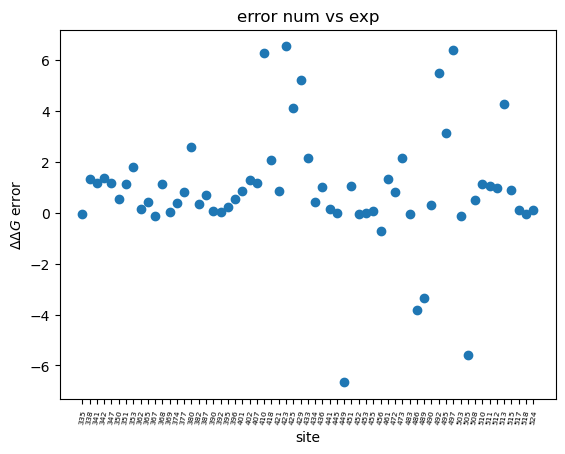

In [16]:
error_first_method = del_del_g_total[mut_arg_idx] - num_66[mut_arg_idx]
plt.scatter(mut_arg_sorted, error_first_method)
plt.tick_params(axis="x", labelsize=5.5, rotation=80)
plt.title("error num vs exp")
plt.ylabel("$\Delta \Delta G$ error")
plt.xlabel("site")

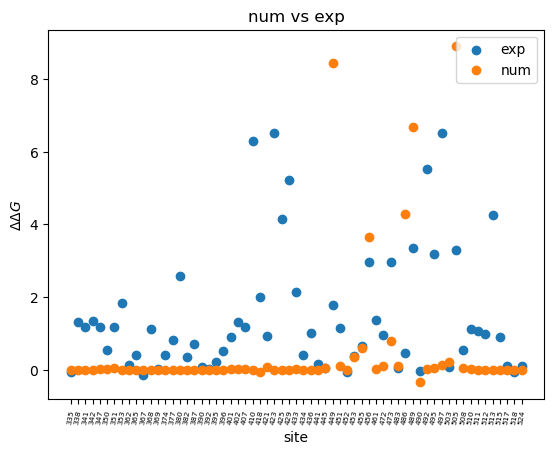

In [17]:
plt.scatter(mut_arg_sorted, del_del_g_total[mut_arg_idx], label="exp")
plt.scatter(mut_arg_sorted, num_66[mut_arg_idx], label="num")
plt.tick_params(axis="x", labelsize=5.5, rotation=80)
plt.title("num vs exp")
plt.ylabel("$\Delta \Delta G$")
plt.xlabel("site")
plt.legend()

function for this:


In [18]:
def delta_delta_G_exp_cal_frist_method(site_SARS2_val ) :
    R = 1.98*1e-3 #1e-3 for cal to kcal conversion 
    T =298  #room temp  
    K_D_app = 3.9*1e-11 #from paper
    
    delta_g_deg = R * T * np.log(K_D_app)
    
    tmp_K_mut = 10**(site_SARS2_val) * K_D_app
    delta_g_first_method = -R * T * np.log(tmp_K_mut)
    del_del_g_total =   delta_g_deg + delta_g_first_method
    return del_del_g_total

get indexes based on mutation and site


In [19]:
simple_amino = ["V", "I", "L", "M", "F", "Y", "W"]
sorted_dict = {} 
for letter_key in simple_amino :
    #get index mutations starting with letter_key 
    dftemp = df_num_data[ \
        df_num_data["mutations"].str.startswith(letter_key) ].iloc[:,0]
    
    #get mutations from the index
    mut_names = exp_muts_np[idx][dftemp.to_numpy()]
    #sort by binding site 
    site_values = np.array([site[1:-1] for site in mut_names])
    idx_sort = site_values.argsort()
    
    if len(dftemp.to_numpy()[idx_sort]):
        sorted_dict[letter_key] = dftemp.to_numpy()[idx_sort], site_values[idx_sort]
    
#sorted_dict



## Plotting results as a function of amino acid: 

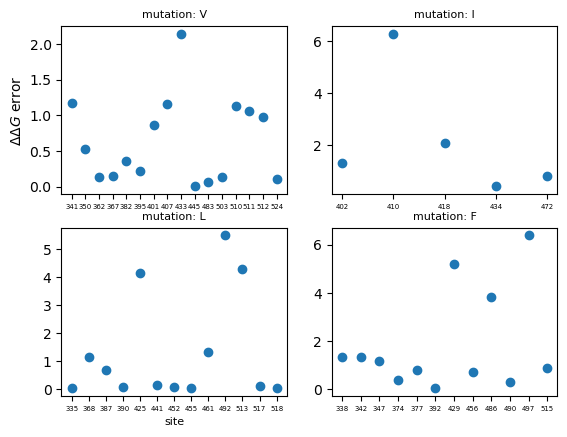

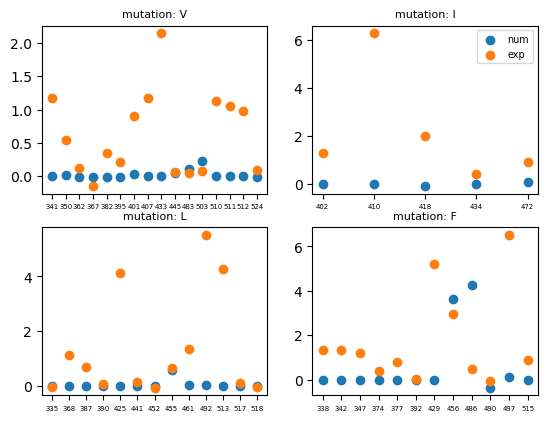

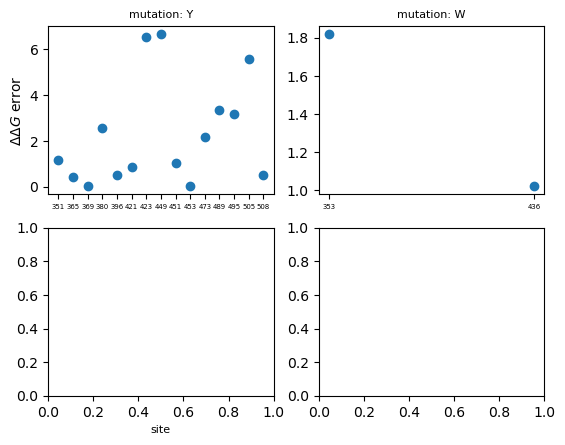

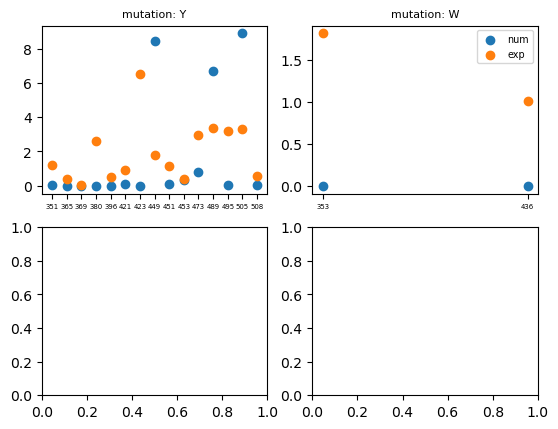

In [20]:
# fig, axs = plt.subplots(2,2)
c = 0
start = 0
stop = 4
error_stats = {}
for num_plots in range(len(list(sorted_dict.keys()))%4 ) :
   
    
    fig, axs = plt.subplots(2,2)
    fig2, axs2 = plt.subplots(2,2)
    c = 0
    
    for mut_name in list(sorted_dict.keys())[start:stop]:
        #plt.figure()
        #plt.subplot(2,2,i)
        j = c%2
        i= c//2
        
        mut_site_val =df_exp_data.iloc[idx]["bind_avg"].to_numpy()[sorted_dict[mut_name][0]]
        delta_delta_G_exp_cal_frist_method
        #convert values 
        mut_site_val_converted = delta_delta_G_exp_cal_frist_method(mut_site_val)
        
        site_error = np.abs(mut_site_val_converted - num_66[sorted_dict[mut_name][0]] )
        error_stats[mut_name] = np.mean(site_error), np.std(site_error)
        
        #num data
        axs2[i,j].scatter(sorted_dict[mut_name][1], num_66[sorted_dict[mut_name][0]], label="num")
        #exp data 
        axs2[i,j].scatter(sorted_dict[mut_name][1], mut_site_val_converted, label="exp")
        
        axs2[i,j].set_title(f"mutation: {mut_name}", fontsize=8)
        axs2[i,j].tick_params(axis="x", labelsize=5)
        
        
        axs[i,j].scatter(sorted_dict[mut_name][1], site_error)
        axs[i,j].set_title(f"mutation: {mut_name}", fontsize=8)
        axs[i,j].tick_params(axis="x", labelsize=5)
        #plt.xlabel("site")
        c= c+1 
    #axs.tick_params(axis="x", labelsize=5)
    plt.tight_layout
    axs[1,0].set_xlabel("site", fontsize= 8)
    axs[0,0].set_ylabel("$\Delta \Delta G}$ error")
    axs2[0,1].legend(fontsize="x-small")
    start = stop
    stop = min( (stop+4, len(list(sorted_dict.keys()))))

Text(0, 0.5, '$\\Delta \\Delta G}$ error')

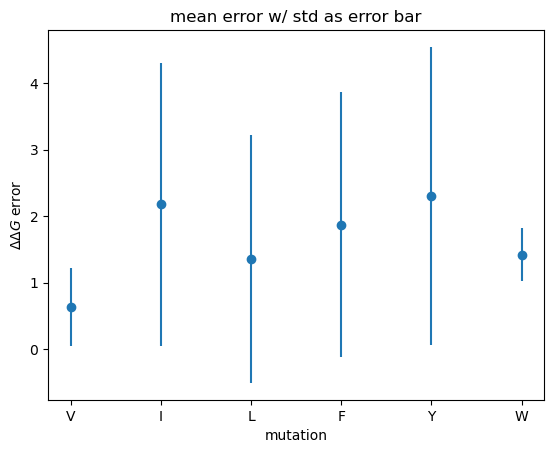

In [21]:
#error_stats
# plt.scatter(list(error_stats.keys()), \
#     [mean [0] for mean in list(error_stats.values())] ) 
plt.errorbar(list(error_stats.keys()), \
    [mean [0] for mean in list(error_stats.values())],
    yerr=[mean [1] for mean in list(error_stats.values())],
    fmt="o")
plt.title("mean error w/ std as error bar")
plt.xlabel("mutation")
plt.ylabel("$\Delta \Delta G}$ error")

## checking expr vs site:


In [22]:
expr_SARS2_val = df_exp_data.iloc[idx]["expr_avg"].to_numpy()

using expr avg

In [23]:
del_del_g_total_expr = delta_delta_G_exp_cal_frist_method(expr_SARS2_val)

Text(0.5, 0, 'site')

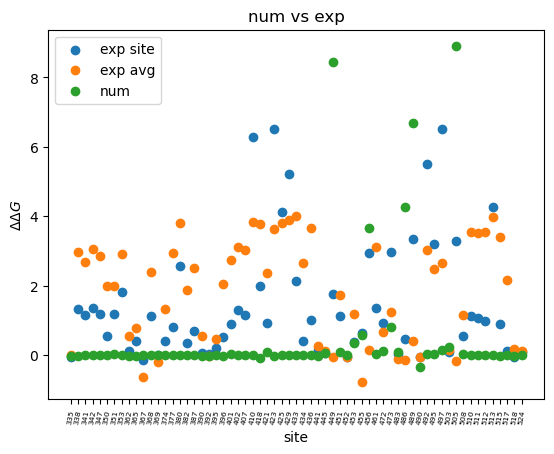

In [24]:

fig3, axs3 = plt.subplots(1,1)

axs3.set_title("num vs exp")
axs3.scatter(mut_arg_sorted, del_del_g_total[mut_arg_idx], label="exp site")
axs3.scatter(mut_arg_sorted, del_del_g_total_expr[mut_arg_idx], label="exp avg")
axs3.scatter(mut_arg_sorted, num_66[mut_arg_idx], label="num")

axs3.tick_params(axis="x", labelsize=5.5, rotation=80)
axs3.legend()
axs3.set_ylabel("$\Delta \Delta G$")
axs3.set_xlabel("site")
# axs3[1].scatter(mut_arg_sorted, del_del_g_total_expr[mut_arg_idx], label="exp avg")
# axs3[1].scatter(mut_arg_sorted, num_66[mut_arg_idx], label="num")
# axs3[1].tick_params(axis="x", labelsize=5.5, rotation=80)
# axs3[1].set_xlabel("site")
# axs3[1].legend()

## all mutations using MPI

In [25]:
df_num_data_all = pd.read_csv("all_amino.csv")

In [26]:
num_66_all = - df_num_data_all["delta_delta_g_gen_66"].to_numpy()
num_all     = - df_num_data_all["delta_delta_g_gen"].to_numpy()

In [27]:
num_muts_all = df_num_data_all["mutations"]
exp_muts_np = df_exp_data["mutation"].to_numpy()
idx_all= []  
for mut in num_muts_all : 
    idx_all.append(np.where(exp_muts_np == mut )[0][0] ) 

In [28]:
mut_arg_all =np.array([mut[1:-1] for mut in df_num_data_all["mutations"].to_numpy()])
mut_arg_idx_all = mut_arg_all.argsort()
mut_arg_sorted_all = mut_arg_all[mut_arg_idx_all]

In [29]:
num_muts_all[mut_arg_idx_all]

3      T333A
81     N334A
136    L335A
132    C336A
10     P337A
       ...  
128    H519A
95     P521A
65     T523A
39     V524A
49     C525A
Name: mutations, Length: 155, dtype: object

In [30]:
df_exp_data.iloc[idx_all]["mutation"].to_numpy()[mut_arg_idx_all]

array(['T333A', 'N334A', 'L335A', 'C336A', 'P337A', 'F338A', 'E340A',
       'V341A', 'F342A', 'N343A', 'T345A', 'R346A', 'F347A', 'S349A',
       'V350A', 'Y351A', 'W353A', 'N354A', 'R355A', 'K356A', 'S359A',
       'N360A', 'V362A', 'D364A', 'Y365A', 'S366A', 'V367A', 'L368A',
       'Y369A', 'N370A', 'S371A', 'S373A', 'F374A', 'S375A', 'T376A',
       'F377A', 'K378A', 'C379A', 'Y380A', 'V382A', 'S383A', 'P384A',
       'T385A', 'K386A', 'L387A', 'N388A', 'D389A', 'L390A', 'C391A',
       'F392A', 'T393A', 'V395A', 'Y396A', 'D398A', 'S399A', 'V401A',
       'I402A', 'R403A', 'D405A', 'V407A', 'R408A', 'Q409A', 'I410A',
       'P412A', 'Q414A', 'T415A', 'K417A', 'I418A', 'D420A', 'Y421A',
       'N422A', 'Y423A', 'K424A', 'L425A', 'D428A', 'F429A', 'T430A',
       'C432A', 'V433A', 'I434A', 'W436A', 'S438A', 'N439A', 'N440A',
       'L441A', 'D442A', 'S443A', 'K444A', 'V445A', 'N448A', 'Y449A',
       'N450A', 'Y451A', 'L452A', 'Y453A', 'R454A', 'L455A', 'F456A',
       'R457A', 'S45

In [31]:
site_SARS2_val_all = df_exp_data.iloc[idx_all]["bind_avg"].to_numpy()

In [32]:
del_del_G_all_muts = delta_delta_G_exp_cal_frist_method(site_SARS2_val_all)

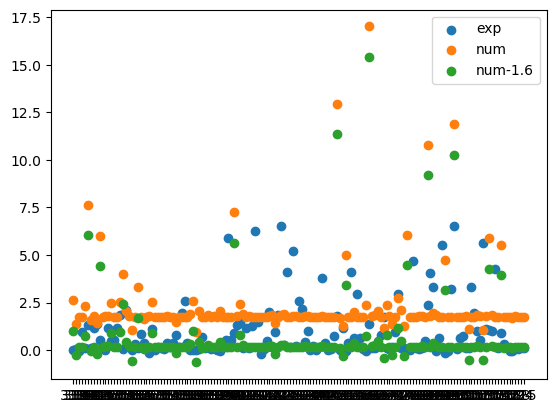

In [33]:
plt.scatter(mut_arg_sorted_all, del_del_G_all_muts[mut_arg_idx_all], label="exp")
#plt.scatter(mut_arg_sorted, del_del_g_total[mut_arg_idx], label="exp")
plt.scatter(mut_arg_idx_all, num_66_all[mut_arg_idx_all], label="num")
plt.scatter(mut_arg_idx_all, num_66_all[mut_arg_idx_all]-1.6, label="num-1.6")
plt.legend()

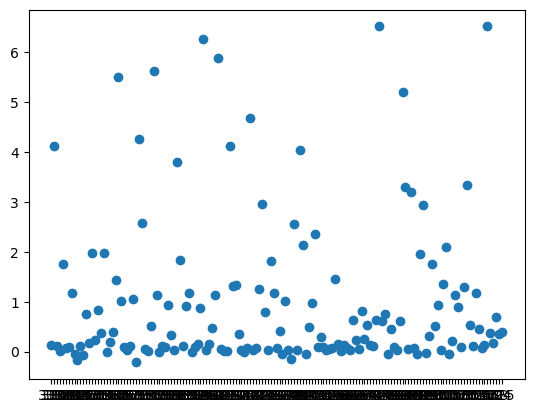

In [34]:
plt.scatter(mut_arg_sorted_all, del_del_G_all_muts)

In [35]:
num_66_all[mut_arg_idx], del_del_G_all_muts[mut_arg_idx]

(array([6.0153, 1.7548, 1.3589, 1.7532, 1.7658, 1.7881, 2.5021, 1.7681,
        1.7654, 1.8862, 1.7342, 2.0428, 1.7622, 2.3246, 0.9458, 1.8689,
        1.7549, 1.7548, 1.7519, 1.7629, 1.7887, 1.7604, 1.7543, 2.4936,
        7.246 , 2.0485, 1.7507, 1.7599, 7.6392, 1.4641, 3.3051, 1.7502,
        1.7584, 1.757 , 1.7678, 1.9194, 2.5408, 1.7899, 1.7617, 2.4018,
        1.036 , 1.562 , 3.997 , 1.7506, 2.6026, 1.7568, 1.7504, 1.7586,
        1.779 , 1.7548, 1.7724, 1.7431, 1.4056, 1.7602, 2.6108, 1.754 ,
        1.7508, 1.6582, 1.7271, 1.7591, 1.7611, 2.0303, 1.7624]),
 array([-0.17662025,  1.12765237,  4.13019662,  0.        , -0.01358617,
         0.        ,  0.12227556,  0.05434469,  1.12765237,  0.05434469,
         0.51627458,  3.80412846,  1.18199706,  1.75261633,  0.04075852,
         0.92385977,  0.12227556,  0.01358617, -0.21737877,  2.58137289,
         0.76082569,  0.23096494,  0.12227556,  0.17662025,  0.47551606,
         0.1494479 ,  1.31785879,  0.04075852,  0.08151704,  5.63

## All mutations w/o MPI

function for processing: 

In [36]:
def exp_v_num_plotter( csv_name, df_exp_data) : 
    #get csv
    df_num_data_all_single_core = pd.read_csv(csv_name)
    #get mut names
    num_muts_all_sc = df_num_data_all_single_core["mutations"]
    #get mut names from exp DF
    exp_muts_np = df_exp_data["mutation"].to_numpy()
    #find matching index
    idx_all= []  
    for mut in num_muts_all_sc : 
        idx_all.append(np.where(exp_muts_np == mut )[0][0] ) 

    #get binding_avg value of the matching idx 
    site_SARS2_val_all = df_exp_data.iloc[idx_all]["bind_avg"].to_numpy()
    #calc Del_Del_G
    del_del_G_all_muts = delta_delta_G_exp_cal_frist_method(site_SARS2_val_all)
    
    #get sorting idx del del G from numerical data
    num_66_all_sc = - df_num_data_all_single_core["delta_delta_g_gen_66"].to_numpy()
    mut_arg_all =np.array([mut[1:-1] for mut in df_num_data_all["mutations"].to_numpy()])
    mut_arg_idx_all = mut_arg_all.argsort()
    mut_arg_sorted_all = mut_arg_all[mut_arg_idx_all]
    
    
    
    plt.figure(1)
    plt.scatter(mut_arg_sorted_all[0:75], del_del_G_all_muts[mut_arg_idx_all][0:75], label="exp")
    #plt.scatter(mut_arg_sorted, del_del_g_total[mut_arg_idx], label="exp")
    plt.scatter(mut_arg_sorted_all[0:75], num_66_all_sc[mut_arg_idx_all][0:75], label="num")
    plt.legend()
    plt.tick_params(axis="x", labelsize=5.5, rotation=80)
    plt.legend()
    plt.ylabel("$\Delta \Delta G$")
    plt.xlabel("site")
    
    plt.figure(2)
    plt.scatter(mut_arg_sorted_all[75:], del_del_G_all_muts[mut_arg_idx_all][75:], label="exp")
    #plt.scatter(mut_arg_sorted, del_del_g_total[mut_arg_idx], label="exp")
    plt.scatter(mut_arg_sorted_all[75:], num_66_all_sc[mut_arg_idx_all][75:], label="num")
    plt.legend()
    plt.tick_params(axis="x", labelsize=5.5, rotation=80)
    plt.legend()
    plt.ylabel("$\Delta \Delta G$")
    plt.xlabel("site")
    return 

    

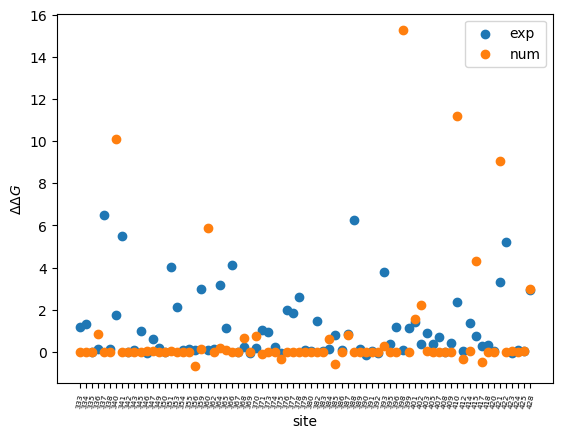

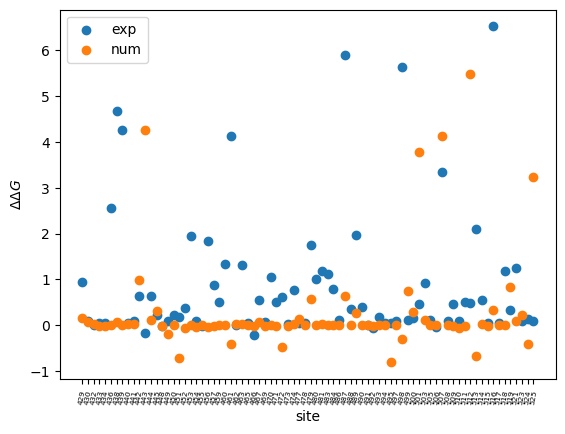

In [37]:
exp_v_num_plotter("all_amino_single_core.csv", df_exp_data)

## binding site:


In [38]:
binding_idx = np.array([417, 439, 446, 449, 453, 455, 456, 475, 486, \
                487, 489, 493, 494, 496, 498, 500, 501, 502, 503, 505])

In [39]:
df_num_data_all_single_core = pd.read_csv("all_amino_single_core.csv")
#get mut names
num_muts_all_sc = df_num_data_all_single_core["mutations"]
#get mut names from exp DF
exp_muts_np = df_exp_data["mutation"].to_numpy()

num_66_all_sc = - df_num_data_all_single_core["delta_delta_g_gen_66"].to_numpy()
mut_arg_all =np.array([mut[1:-1] for mut in df_num_data_all["mutations"].to_numpy()])
mut_arg_idx_all = mut_arg_all.argsort()
mut_arg_sorted_all = mut_arg_all[mut_arg_idx_all]

mut_arg_idx_all_site =[]
for arr_idx ,mut_idx in enumerate (mut_arg_sorted_all ):
    if int(mut_idx) in binding_idx:
        mut_arg_idx_all_site.append(arr_idx)
        
 


#num_66_all_sc[mut_arg_idx_all][mut_arg_idx_all_site]




In [61]:
df_num_data_all_single_core_optrad = pd.read_csv("all_amino_with_optradii.csv")
num_66_all_sc_or = - df_num_data_all_single_core_optrad["delta_delta_g_gen_66"].to_numpy()
num_muts_all_sc_or = df_num_data_all_single_core_optrad["mutations"].to_numpy()

mut_arg_all_or =np.array([mut[1:-1] for mut in df_num_data_all_single_core_optrad["mutations"].to_numpy()])
mut_arg_idx_all_or = mut_arg_all_or.argsort()
mut_arg_sorted_all_or = mut_arg_all_or[mut_arg_idx_all_or]




In [64]:
mut_arg_idx_all_site_or =[]
for arr_idx ,mut_idx in enumerate (mut_arg_sorted_all_or ):
    if int(mut_idx) in binding_idx:
        mut_arg_idx_all_site_or.append(arr_idx)

In [68]:
num_muts_all_sc_or[mut_arg_idx_all_or][mut_arg_idx_all_site_or]

array(['K417A', 'N439A', 'Y449A', 'Y453A', 'L455A', 'F456A', 'F486A',
       'N487A', 'Y489A', 'Q493A', 'S494A', 'Q498A', 'T500A', 'N501A',
       'V503A', 'Y505A'], dtype=object)

In [70]:
num_66_all_sc_or[mut_arg_idx_all_or][mut_arg_idx_all_site_or]


array([ 4.1941,  0.1867, 10.2066,  3.8649,  8.0585,  4.9345,  4.7254,
       11.5308,  7.2399,  6.4324, -0.0437, 23.896 ,  4.9999,  7.9803,
       -1.5668,  9.0972])

In [ ]:
(- df_num_data_all_single_core_optrad["delta_delta_g_gen_66"].to_numpy())[mut_arg_idx_all_or][mut_arg_idx_all_site_or]

Text(0.5, 0, 'site')

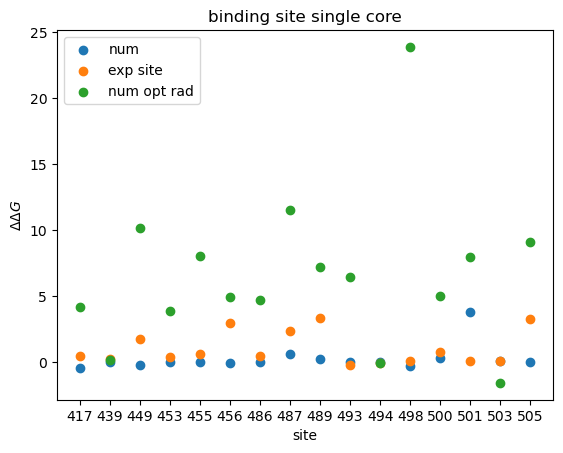

In [69]:
plt.scatter( mut_arg_all[mut_arg_idx_all][mut_arg_idx_all_site]
            , num_66_all_sc[mut_arg_idx_all][mut_arg_idx_all_site], label="num")

plt.scatter(mut_arg_all[mut_arg_idx_all][mut_arg_idx_all_site], 
             del_del_G_all_muts[mut_arg_idx_all][mut_arg_idx_all_site], label="exp site")
# plt.scatter(mut_arg_all[mut_arg_idx_all][mut_arg_idx_all_site], 
#             num_66_all[mut_arg_idx_all][mut_arg_idx_all_site], label="num_MPI")
plt.scatter(mut_arg_all[mut_arg_idx_all][mut_arg_idx_all_site], 
             num_66_all_sc_or[mut_arg_idx_all_or][mut_arg_idx_all_site_or], label="num opt rad")
plt.legend()
plt.title("binding site single core")
plt.ylabel("$\Delta \Delta G$")
plt.xlabel("site")